In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sn

#df_train = pd.read_csv("./df_train.csv",index_col=0)
df_test = pd.read_csv("./df_test.csv",index_col=0)
df_test

,texture_mean,area_worst,smoothness_worst,area_mean,concavity_mean,diagnosis
400,21.02,1304.0,0.1873,994.0,0.31890,1
225,13.47,873.2,0.1297,641.2,0.05724,0
321,19.66,1657.0,0.1054,1274.0,0.11550,1
173,14.71,396.5,0.1216,372.7,0.02363,0
506,20.04,515.3,0.1402,453.1,0.08175,0
...,...,...,...,...,...,...
100,24.98,906.5,0.1265,582.7,0.08625,1
7,20.83,897.0,0.1654,577.9,0.09366,1
361,21.57,621.2,0.1140,546.1,0.03344,0
343,21.68,1540.0,0.1218,1194.0,0.18630,1


In [ ]:
target = 'diagnosis'

In [ ]:
len(df_test)

171

## Model

The formula of logit function is:

       logit(μ) = b0 + b1x1 + b2x2 + b3x3 + b4x4 + b5x5

- The logit function is the inverse of the logistic function. For 0 < μ < 1, logit(μ) = log (μ/(1 − μ)) where log is the natural logarithm. 
- The predicted probability of y=1 (malignant tumor) is logistic(β0+β1x1+β2x2+β3x3+β4x4+β5x5) = μ
- That probability is a log odds of log p(y=1)/p(y=0). The ratio, p(y=1)/p(y=0), is called the odds of outcome 1 to outcome 0.


In [ ]:
# example from the book 
# suppose weight = 160 and heigth = 63
# b0 = -10, b1 = 0.02, b3 = 0.7
# The predicted probability of being male is logistic(β0+β1x1+β2x2) = 0.063.
# That probability is a log odds of log(0.063/(1 − 0.063)) = −2.70.
# An increment of 1 unit in x2 (height) increases the log odds by b2.
# The negative value of the log odds indicates the probability is less than 50%.
-50 + 0.02*160 + 0.7*63

-2.700000000000003

In [ ]:
# example from the book 
# now suppose weight = 160 and heigth = 67 with same beta parameters
# The predicted probability of being male is logistic(β0+β1x1+β2x2) = 0.525.
# That probability is a log odds of log(0.525/(1 − 0.525)) = 0.10. 
# An increment of 1 unit in x2 (height) increases the log odds by b2.
# The positive value of the log odds indicates the probability is greater than 50%.
-50 + 0.02*160 + 0.7*67

0.10000000000000142

In [ ]:
betas = [-29.6448, 0.3382, 0.0083, 83.3330, 0.0047, 18.8321] # mean value of parameters
# mode!!
model_features = [ "texture_mean","area_worst","smoothness_worst","area_mean","concavity_mean"]

In [ ]:
def make_prediction(log_odds):
    prediction = []
    for i in range(len(log_odds)):
        # positive value of log odds indicates the probability of y=1 is more than 50%.
        if float(log_odds[i:i+1]) > 0.0:
            prediction.append(1) # malignant tumor
        elif float(log_odds[i:i+1]) < 0.0:
        # negative value of log odds indicates the probability of y=1 is less than 50%.
            prediction.append(0) # non malignant tumor
    return prediction
    
def cal_log_odds(df_test, model_features, betas):
    b = betas
    # calculate log odds
    log_odds = b[0] + b[1]*df_test[model_features[0]] + b[2]*df_test[model_features[1]] + b[3]*df_test[model_features[2]] + b[4]*df_test[model_features[3]]  + b[5]*df_test[model_features[4]]
    df_test["log_odds"] = log_odds
    
    # make prediction based on log odds
    prediction = make_prediction(log_odds)
    df_test["prediction"] = prediction
    
    return df_test

In [ ]:
df_test_model = cal_log_odds(df_test, model_features, betas)
df_test_model

,texture_mean,area_worst,smoothness_worst,area_mean,concavity_mean,diagnosis,log_odds,prediction
400,21.02,1304.0,0.1873,994.0,0.31890,1,14.572992,1
225,13.47,873.2,0.1297,641.2,0.05724,0,-2.941806,0
321,19.66,1657.0,0.1054,1274.0,0.11550,1,7.703518,1
173,14.71,396.5,0.1216,372.7,0.02363,0,-9.048943,0
506,20.04,515.3,0.1402,453.1,0.08175,0,-3.237901,0
...,...,...,...,...,...,...,...,...
100,24.98,906.5,0.1265,582.7,0.08625,1,1.231969,1
7,20.83,897.0,0.1654,577.9,0.09366,1,3.108229,1
361,21.57,621.2,0.1140,546.1,0.03344,0,-4.497489,0
343,21.68,1540.0,0.1218,1194.0,0.18630,1,9.739556,1


In [ ]:
for i in range(len(df_test_model)):
    if float(df_test_model[target][i:i+1]) != float(df_test_model["prediction"][i:i+1]):
        print(df_test_model[["diagnosis", "log_odds", "prediction"]][i:i+1])

    diagnosis  log_odds  prediction
40          1 -3.458465           0
     diagnosis  log_odds  prediction
537          0  0.162342           1
     diagnosis  log_odds  prediction
263          1 -1.493744           0
     diagnosis  log_odds  prediction
489          1 -0.689757           0


In [ ]:
# metrics 
corrects = 0
false_negatives = []
false_positives = []

for i in range(len(df_test)):
    actualClass = df_test["diagnosis"][i:i+1]
    predictedClass = df_test["prediction"][i:i+1]
    if int(actualClass) == int(predictedClass):
        corrects +=1
    elif int(actualClass)==0 and int(predictedClass)==1:
        false_positives.append(df_test[i:i+1])
    elif int(actualClass)==1 and int(predictedClass)==0:
        false_negatives.append(df_test[i:i+1])
            
print("Number of true positives = ", corrects)
print("Number of false negatives = ", len(false_negatives))
print("Number of false positives = ", len(false_positives))
 

Number of true positives =  167
Number of false negatives =  3
Number of false positives =  1


In [ ]:
accuracy = corrects/len(df_test)
print("Accuracy = ", accuracy)

Accuracy =  0.9766081871345029


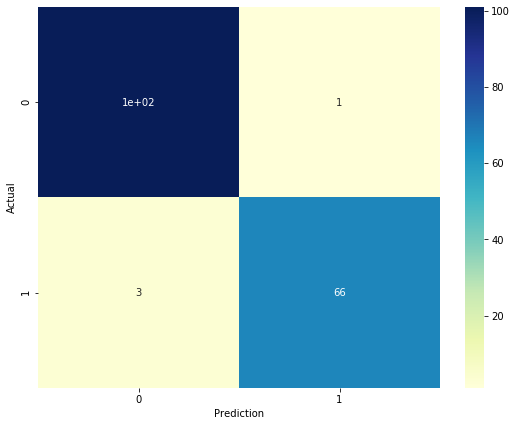

In [ ]:
# confusion matrix
y_actual = pd.Series(df_test_model[target], name='Actual')
y_predicted = pd.Series(df_test_model["prediction"], name='Prediction')
confusion_matrix = pd.crosstab(y_actual, y_predicted)

fig, ax = plt.subplots(figsize=(9,7))
sn.heatmap(confusion_matrix, annot=True, cmap="YlGnBu")
plt.show()

In [ ]:
false_negatives[0]

,texture_mean,area_worst,smoothness_worst,area_mean,concavity_mean,diagnosis,log_odds,prediction
40,21.58,787.9,0.1094,563.0,0.0311,1,-3.458465,0


In [ ]:
false_negatives[1]

,texture_mean,area_worst,smoothness_worst,area_mean,concavity_mean,diagnosis,log_odds,prediction
263,19.38,988.6,0.1084,758.6,0.04209,1,-1.493744,0


In [ ]:
false_negatives[2]

,texture_mean,area_worst,smoothness_worst,area_mean,concavity_mean,diagnosis,log_odds,prediction
489,20.2,1084.0,0.1009,857.6,0.03649,1,-0.689757,0
